## Cavity Flow 
$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = -\frac{1}{p}\frac{\partial p}{\partial x} + v(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2})
$
, For x direction 

$
\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = -\frac{1}{p}\frac{\partial p}{\partial y} + v(\frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2})
$
, For y direction 


Poisson Equation for pressure and velocity for low viscosity
$
\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = - \rho[(\frac{\partial u}{\partial x})^2 + 2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x} + (\frac{\partial v}{\partial y})^2]
$

let dx = dy = h

IC and BC:

$u,v,p = 0$

$u = 1$ at $y = 2$ else $u,v = 0$

$\frac{\partial p}{\partial y} = 0$ at $y = 0$

$p = 0$ at $y = 2$ 

$\frac{\partial p}{\partial x} = 0$ at $x = 0,2$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D  

In [15]:
#constant 
nx = 30
ny = 30
nt = 100
dx = 2 / nx
dy = 2 / ny
xs = np.linspace(0, 2, nx)
ys = np.linspace(0, 2, ny)
X, Y = np.meshgrid(xs, ys)

rho = 1
nu = .1
dt = .001
#init 
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

In [16]:
#poisson equation and BC for pressure

def create_B(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

def pressure_poisson(p, dx, dy, b):
    p0 = p.copy()
    
    for q in range(50):
        p0 = p.copy()
        p[1:-1, 1:-1] = (((p0[1:-1, 2:] + p0[1:-1, 0:-2]) * dy**2 + 
                          (p0[2:, 1:-1] + p0[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[-1, :] = 0       
        p[:, -1] = p[:, -2] 
        p[0, :] = p[1, :]  
        p[:, 0] = p[:, 1]   
        
    return p


In [17]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    b = np.zeros((ny, nx))    
    for n in range(nt):
        u0 = u.copy()
        v0 = v.copy()
        
        b = create_B(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (u0[1:-1, 1:-1]-
                         u0[1:-1, 1:-1] * dt / dx *
                        (u0[1:-1, 1:-1] - u0[1:-1, 0:-2]) -
                         v0[1:-1, 1:-1] * dt / dy *
                        (u0[1:-1, 1:-1] - u0[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (u0[1:-1, 2:] - 2 * u0[1:-1, 1:-1] + u0[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (u0[2:, 1:-1] - 2 * u0[1:-1, 1:-1] + u0[0:-2, 1:-1])))

        v[1:-1,1:-1] = (v0[1:-1, 1:-1] -
                        u0[1:-1, 1:-1] * dt / dx *
                       (v0[1:-1, 1:-1] - v0[1:-1, 0:-2]) -
                        v0[1:-1, 1:-1] * dt / dy *
                       (v0[1:-1, 1:-1] - v0[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (v0[1:-1, 2:] - 2 * v0[1:-1, 1:-1] + v0[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (v0[2:, 1:-1] - 2 * v0[1:-1, 1:-1] + v0[0:-2, 1:-1])))

        u[-1, :] = 1  
        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        
    return u, v, p

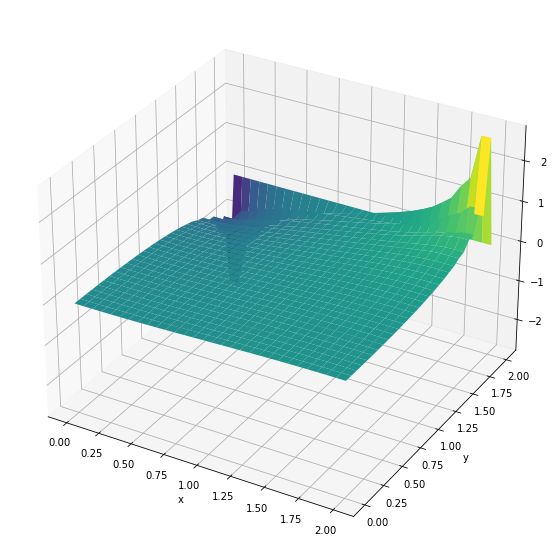

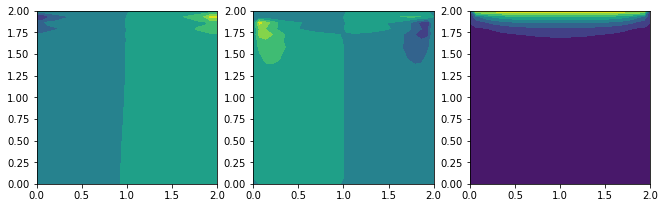

In [18]:
# init 
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))


u,v,p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)



fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                     
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, p ,cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')

fig = plt.figure(figsize=(11,7))
plt.subplot(2,3,1)
plt.contourf(X, Y, p, cmap=cm.viridis)  
plt.subplot(2,3,2)
plt.contourf(X, Y, v, cmap=cm.viridis) 
plt.subplot(2,3,3)
plt.contourf(X, Y, u, cmap=cm.viridis) 

plt.show()

<ipython-input-19-569c212ad9c6>:11: UserWarning: No contour levels were found within the data range.
  cr = ax.contour(X,Y,p, cmap=cm.viridis)
MovieWriter ffmpeg unavailable; using Pillow instead.
<ipython-input-19-569c212ad9c6>:21: UserWarning: No contour levels were found within the data range.
  cc = ax.contour(X,Y,p, cmap=cm.viridis)
<ipython-input-19-569c212ad9c6>:62: UserWarning: No contour levels were found within the data range.
  cc = ax.contour(X,Y,p, cmap=cm.viridis)
C:\Users\Windows10\anaconda3\lib\site-packages\matplotlib\quiver.py:686: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\Windows10\anaconda3\lib\site-packages\matplotlib\quiver.py:686: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


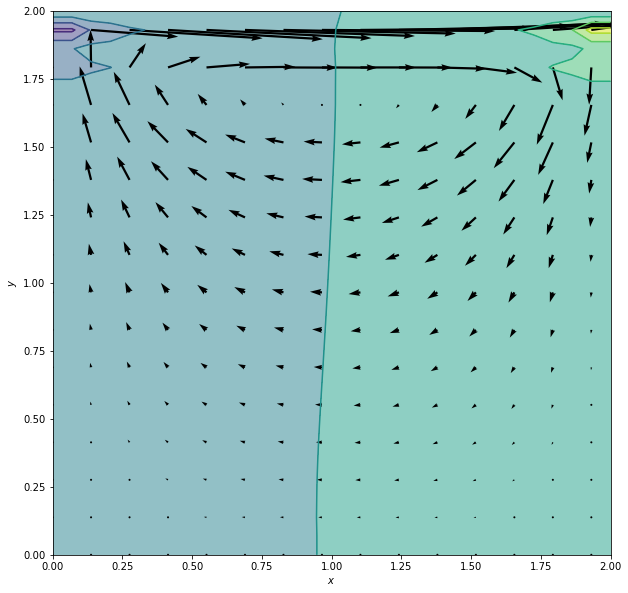

In [19]:
# animate 
#init
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
cr = ax.contour(X,Y,p, cmap=cm.viridis)
skip = 2
cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


def init():
    ax.clear()
    cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
    cc = ax.contour(X,Y,p, cmap=cm.viridis)
    cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
    return cf,cc,cq

def animate(frames,b,p,u,v):
    u0 = u.copy()
    v0 = v.copy()
    
    b = create_B(b, rho, dt, u, v, dx, dy)
    p = pressure_poisson(p, dx, dy, b)
    
    u[1:-1, 1:-1] = (u0[1:-1, 1:-1]-
                     u0[1:-1, 1:-1] * dt / dx *
                    (u0[1:-1, 1:-1] - u0[1:-1, 0:-2]) -
                     v0[1:-1, 1:-1] * dt / dy *
                    (u0[1:-1, 1:-1] - u0[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 *
                    (u0[1:-1, 2:] - 2 * u0[1:-1, 1:-1] + u0[1:-1, 0:-2]) +
                     dt / dy**2 *
                    (u0[2:, 1:-1] - 2 * u0[1:-1, 1:-1] + u0[0:-2, 1:-1])))
    v[1:-1,1:-1] = (v0[1:-1, 1:-1] -
                    u0[1:-1, 1:-1] * dt / dx *
                   (v0[1:-1, 1:-1] - v0[1:-1, 0:-2]) -
                    v0[1:-1, 1:-1] * dt / dy *
                   (v0[1:-1, 1:-1] - v0[0:-2, 1:-1]) -
                    dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (dt / dx**2 *
                   (v0[1:-1, 2:] - 2 * v0[1:-1, 1:-1] + v0[1:-1, 0:-2]) +
                    dt / dy**2 *
                   (v0[2:, 1:-1] - 2 * v0[1:-1, 1:-1] + v0[0:-2, 1:-1])))
    u[-1, :] = 1  
    u[0, :]  = 0
    u[:, 0]  = 0
    u[:, -1] = 0
    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
    ax.clear()
    cf = ax.contourf(X,Y,p,alpha= 0.5, cmap=cm.viridis)
    cc = ax.contour(X,Y,p, cmap=cm.viridis)
    cq = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    return cf,cc,cq


anim = animation.FuncAnimation(fig, animate,init_func=init,fargs=(p,b,u,v),frames=200, repeat=False)
anim.save('cavity flow2.gif', fps = 20)


MovieWriter ffmpeg unavailable; using Pillow instead.


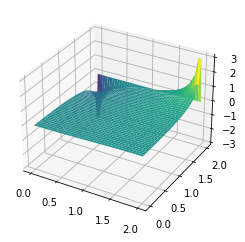

In [47]:
#init 
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, p, cmap=cm.viridis)

def animate(frames,surf,p):
    global b,u,v
    v0 = v.copy()
    u0 = u.copy()
    p0 = p.copy()
    
    b = create_B(b, rho, dt, u, v, dx, dy)
    p = pressure_poisson(p, dx, dy, b)
    
    u[1:-1, 1:-1] = (u0[1:-1, 1:-1]-
                     u0[1:-1, 1:-1] * dt / dx *
                    (u0[1:-1, 1:-1] - u0[1:-1, 0:-2]) -
                     v0[1:-1, 1:-1] * dt / dy *
                    (u0[1:-1, 1:-1] - u0[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 *
                    (u0[1:-1, 2:] - 2 * u0[1:-1, 1:-1] + u0[1:-1, 0:-2]) +
                     dt / dy**2 *
                    (u0[2:, 1:-1] - 2 * u0[1:-1, 1:-1] + u0[0:-2, 1:-1])))
    v[1:-1,1:-1] = (v0[1:-1, 1:-1] -
                    u0[1:-1, 1:-1] * dt / dx *
                   (v0[1:-1, 1:-1] - v0[1:-1, 0:-2]) -
                    v0[1:-1, 1:-1] * dt / dy *
                   (v0[1:-1, 1:-1] - v0[0:-2, 1:-1]) -
                    dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (dt / dx**2 *
                   (v0[1:-1, 2:] - 2 * v0[1:-1, 1:-1] + v0[1:-1, 0:-2]) +
                    dt / dy**2 *
                   (v0[2:, 1:-1] - 2 * v0[1:-1, 1:-1] + v0[0:-2, 1:-1])))
    u[-1, :] = 1  
    u[0, :]  = 0
    u[:, 0]  = 0
    u[:, -1] = 0
    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
    ax.clear()
    surf = ax.plot_surface(X, Y, p, cmap=cm.viridis)
    return surf,

anim = animation.FuncAnimation(fig,animate,fargs=(surf,p) , frames=50, repeat = True)
anim.save('cavity pressure.gif', fps = 20)
plt.show()



